# 학생 성적 예측

In [297]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [298]:
df = pd.read_csv(r'D:\git_space\data\student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [299]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [300]:
# 문자형 카테고리 features를 숫자형 카테고리 features로 labelEncoding

from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

df = encode_features(df)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


### G1 G2 G3는 성적이기 때문에 이의 평균 COLUMN을 따로 생성

In [301]:
df['grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,9,9.000000
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,16,15.333333
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,7,8.333333
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,10,11.000000


In [302]:
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,5.666667
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,5.333333
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,8.333333
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,14.666667
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,9.000000
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,15.333333
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,8.333333
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,11.000000


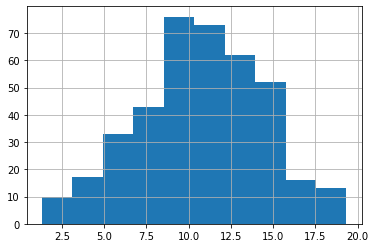

In [303]:
features = df.drop('grade', axis=1, inplace=False)
target = df['grade']

target.hist()

In [304]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [305]:
def metric_func(model):
    model.fit(X_train, y_train)
    MSE = mean_squared_error(y_test, model.predict(X_test))
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, model.predict(X_test))
    R2_score = r2_score(y_test, model.predict(X_test))

    print('RMSE: {}, MAE: {}, R2_score: {}'.format(RMSE, MAE, R2_score))

def get_linear_reg_eval(model_name, params=None, X_data_n=None, index_n=None, y_target_n=None):
    print(model_name)
    coeff_df = pd.DataFrame()

    for param in params:
        if model_name == 'LinearRegression': model = LinearRegression()
        elif model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        elif model_name == 'RandomForestRegression': model = RandomForestRegressor(n_estimators=1000)

        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        neg_mae_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_absolute_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        avg_mae = np.mean(np.sqrt(-1 * neg_mae_scores))

        if model_name == 'LinearRegression':
            print('RMSE: {}, MAE: {}'.format(avg_rmse, avg_mae))
            break
        elif model_name == 'RandomForestRegression':
            print('RMSE: {}, MAE: {}'.format(avg_rmse, avg_mae))
            break
        else: 
            print('alpha {}) RMSE: {}, MAE: {}'.format(param, avg_rmse, avg_mae))
            model.fit(X_data_n, y_target_n)
            coeff = pd.Series(data=model.coef_, index=index_n)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

alphas = [0.07, 0.1, 0.5, 1, 3]

In [313]:
get_linear_reg_eval('LinearRegression', params=alphas, X_data_n=features, index_n=features.columns, y_target_n=target)
get_linear_reg_eval('RandomForestRegression', params=alphas, X_data_n=features, index_n=features.columns, y_target_n=target)

LinearRegression
RMSE: 3.5142466837905553, MAE: 1.68049057374532
RandomForestRegression
RMSE: 3.417341888091431, MAE: 1.6454970586506128


""


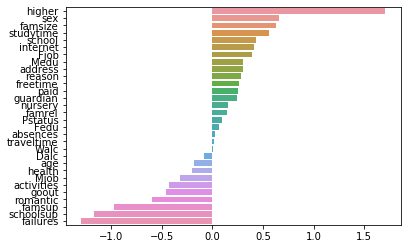

In [314]:
lr = LinearRegression()
lr.fit(X_train, y_train)
coef = pd.Series(lr.coef_, index=features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

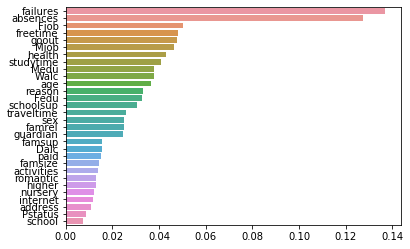

In [315]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(features, target)
feature = pd.Series(data=rf.feature_importances_, index=features.columns)
feature = feature.sort_values(ascending=False)
sns.barplot(x=feature, y=feature.index)

In [309]:
coeff_ridge_df = get_linear_reg_eval('Ridge', params=alphas, X_data_n=features, index_n=features.columns, y_target_n=target)
sort_column = 'alpha:' + str(alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

Ridge
alpha 0.07) RMSE: 3.5138967632621325, MAE: 1.6804029587423497
alpha 0.1) RMSE: 3.5137478834222646, MAE: 1.6803655567905522
alpha 0.5) RMSE: 3.5118225459591406, MAE: 1.6799374913255947
alpha 1) RMSE: 3.5095608241027447, MAE: 1.6794173827085992
alpha 3) RMSE: 3.5018160344000955, MAE: 1.677614540401708


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
higher,1.301507,1.299136,1.268374,1.232049,1.106591
sex,0.962951,0.962533,0.957029,0.950322,0.925169
famsize,0.632453,0.632294,0.630172,0.627520,0.616942
studytime,0.550049,0.549957,0.548724,0.547161,0.540749
address,0.544837,0.544576,0.541124,0.536868,0.520491
internet,0.494334,0.493988,0.489431,0.483885,0.463193
Medu,0.345996,0.346035,0.346539,0.347140,0.349252
freetime,0.281177,0.281133,0.280541,0.279810,0.276978
school,0.265898,0.265735,0.263542,0.260766,0.249510
reason,0.244569,0.244543,0.244202,0.243780,0.242147


In [310]:
coeff_lasso_df = get_linear_reg_eval('Lasso', params=alphas, X_data_n=features, index_n=features.columns, y_target_n=target)
sort_column = 'alpha:' + str(alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

Lasso
alpha 0.07) RMSE: 3.4862031129867517, MAE: 1.6738521045286183
alpha 0.1) RMSE: 3.4936474894499456, MAE: 1.6762298358822556
alpha 0.5) RMSE: 3.529835031957372, MAE: 1.6838817617184847
alpha 1) RMSE: 3.679555622742376, MAE: 1.7246985974670754
alpha 3) RMSE: 3.6974342010326366, MAE: 1.7290218895915168


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
sex,0.570774,0.474750,0.000000,0.000000,0.0
studytime,0.367722,0.277808,0.000000,0.000000,0.0
Medu,0.342377,0.363251,0.200212,0.000000,0.0
famsize,0.313363,0.179410,0.000000,0.000000,0.0
reason,0.190365,0.169147,0.000000,0.000000,0.0
address,0.183837,0.016943,0.000000,0.000000,0.0
freetime,0.148247,0.105391,0.000000,0.000000,0.0
Fedu,0.095782,0.058042,0.000000,0.000000,0.0
Fjob,0.070096,0.028005,0.000000,0.000000,0.0
absences,0.010538,0.006379,0.000000,-0.000000,-0.0


In [311]:
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=features, index_n=features.columns, y_target_n=target)
sort_column = 'alpha:' + str(alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

ElasticNet
alpha 0.07) RMSE: 3.4734380663455497, MAE: 1.6705373585566285
alpha 0.1) RMSE: 3.479138338457922, MAE: 1.6718203217078038
alpha 0.5) RMSE: 3.523858436021713, MAE: 1.6829439854098296
alpha 1) RMSE: 3.6227620469506987, MAE: 1.709540736689957
alpha 3) RMSE: 3.6974342010326366, MAE: 1.7290218895915168


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
sex,0.605240,0.518814,0.000000,0.000000,0.0
studytime,0.402525,0.343867,0.000000,0.000000,0.0
famsize,0.381547,0.285050,0.000000,0.000000,0.0
Medu,0.337831,0.347935,0.292932,0.090025,0.0
address,0.257763,0.158409,0.000000,0.000000,0.0
reason,0.201611,0.187165,0.048074,0.000000,0.0
freetime,0.174017,0.141985,0.000000,0.000000,0.0
higher,0.147761,0.000000,0.000000,0.000000,0.0
Fedu,0.116253,0.097450,0.000000,0.000000,0.0
Fjob,0.101285,0.067197,0.000000,0.000000,0.0
